# Exploratory Data analysis

In [13]:
sys.path.append ('./modules') #The module folder contains the helper file (a collection of written fuction). see below

In [12]:
import sys
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [14]:
#helper module contains functions created to process the data
from helper import feat_list, group, color_map, plot_feature_corr, feat_dist

In [15]:
train_data = joblib.load( 'merged_part_cleaned_trainset') #loading cleaned train data set from previous step
dupl_train_data = joblib.load( 'Duplicates_in_trainset') #loading duplicates in train set as discussed during data prep



Exploring duplicate features with different salaries 

In [16]:
#This codes groups salary values for different feature combinations. the last argument filters using counts in the salary column
group(dupl_train_data, feat_list(dupl_train_data, 'salary'), 1) 


salary
companyId jobType        degree      major   industry  yearsExperience milesFromMetropolis            
COMP0     CEO            BACHELORS   BIOLOGY SERVICE   23              34                   [214, 122]
                         HIGH_SCHOOL NONE    AUTO      0               82                    [129, 97]
                                                       15              13                   [125, 156]
                                                       23              94                   [136, 105]
                                             EDUCATION 11              63                    [106, 83]
...                                                                                                ...
COMP9     VICE_PRESIDENT NONE        NONE    HEALTH    0               7                     [100, 85]
                                             OIL       5               90                   [113, 114]
                                                       12              48                   [126, 138]
                                             WEB       8               23                    [83, 146]
                                                       12              10                   [133, 144]

[7733 rows x 1 columns]

Looking at the first row of the dataframe, we see that a CEO with a bachelors degree, with 23 years of experience
working 34miles from the metropolis for COMP0 in the service industry earned either 214 and 122 as salary (one salary is almost double the other). 

There are over 7000 more rows like this in the data set . 

This suggests there are some missing information (may be time of employment etc). We will leave as is for now


                                                                                                            

-----

Graphing  feature distribution of train data set

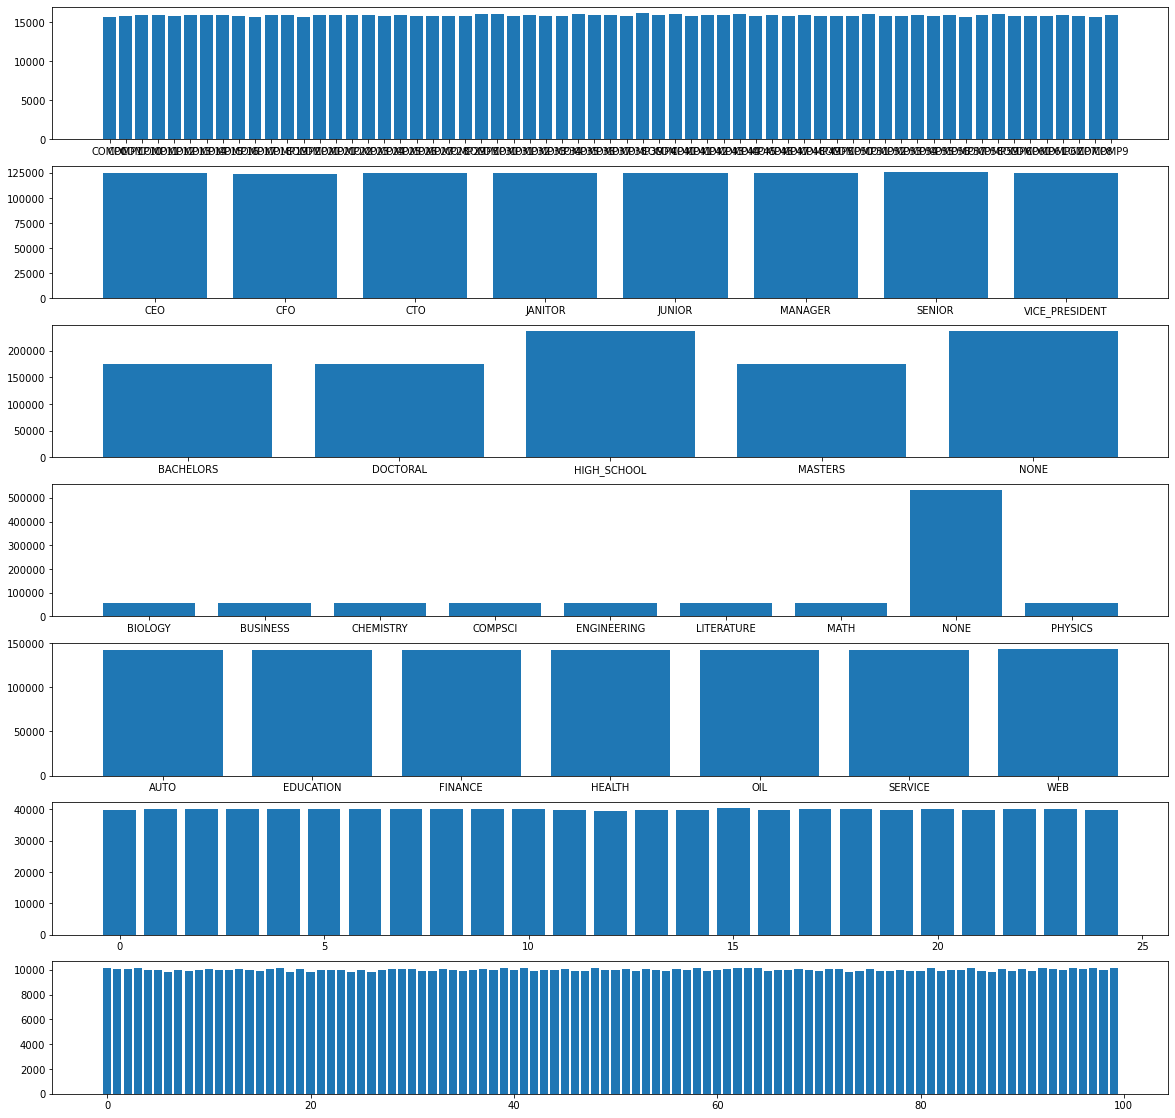

In [49]:
feature_list = feat_list(train_data, 'salary')
feat_dist(train_data, feature_list)

Values in each feature have similar level of occurences in the data set except NONE in major. This is because each degreetype have occurences of NONE major. NONE and HIGH_SCHOOL degrees however have only NONE majors

----

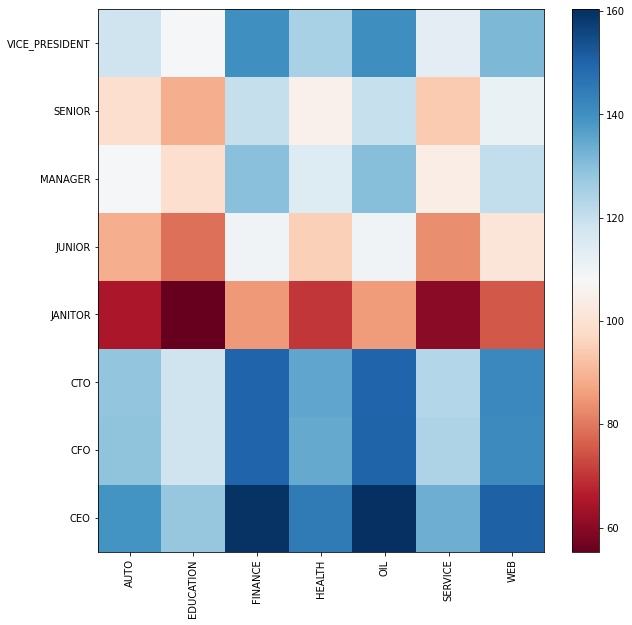

In [19]:
color_map(train_data,'jobType', 'industry')

The color map shows average salaries for different job roles in different industries. As expected CEOs earns the most and janitors earn the least in any industry. The map also shows that average salary for any job type is highest in Finance and Oil indusry  and lowest in Education

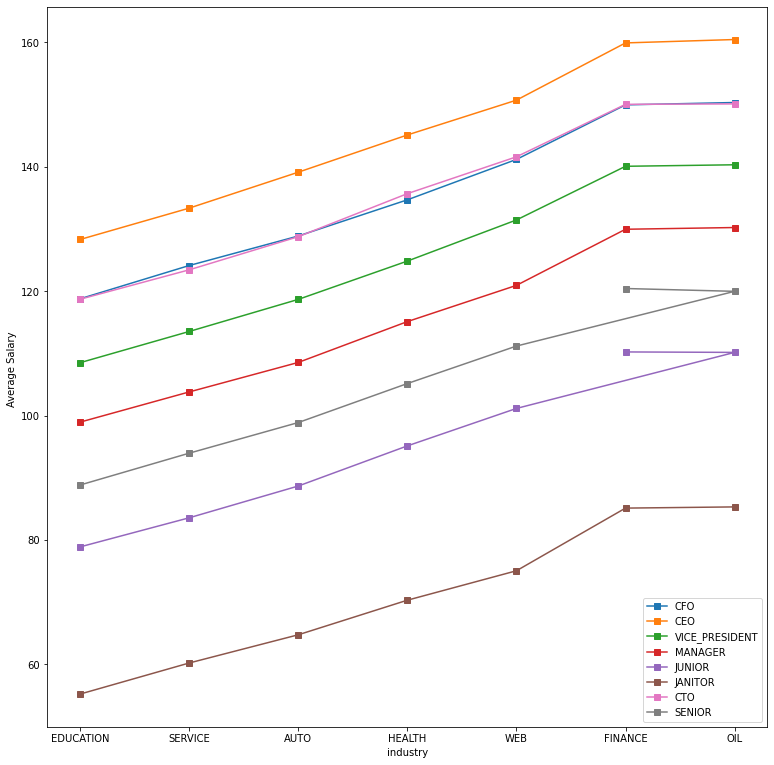

In [53]:
plot_feature_corr(train_data, 'jobType', 'industry', 'salary')

This plot provides a clearer information than color map above

We see clear trend in average salary for different job types. Again we see that CEOs have the highest average salary and janitors have the lowest 

We see a clear trend in the pay by each sector  with the Education sector paying the least for any particular job type and Oil paying the most (oil and finance pay more or less the same)

We also see that CTOs and CFOs have about the same average salary in each sector

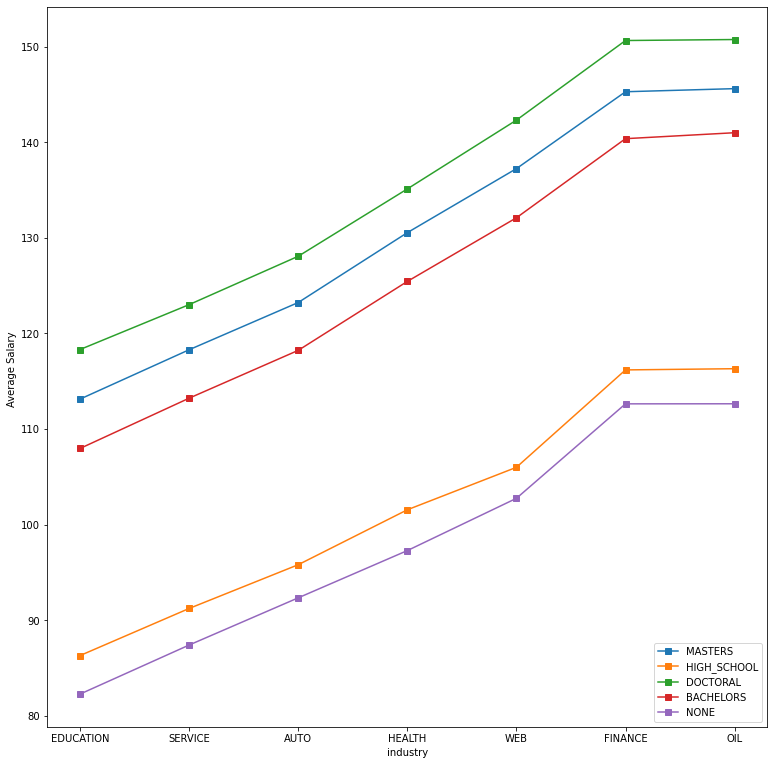

In [21]:
plot_feature_corr(train_data, 'degree', 'industry', 'salary')

There is a clear trend between pay and level of education

There is a significant jump in pay between high school education and university level education

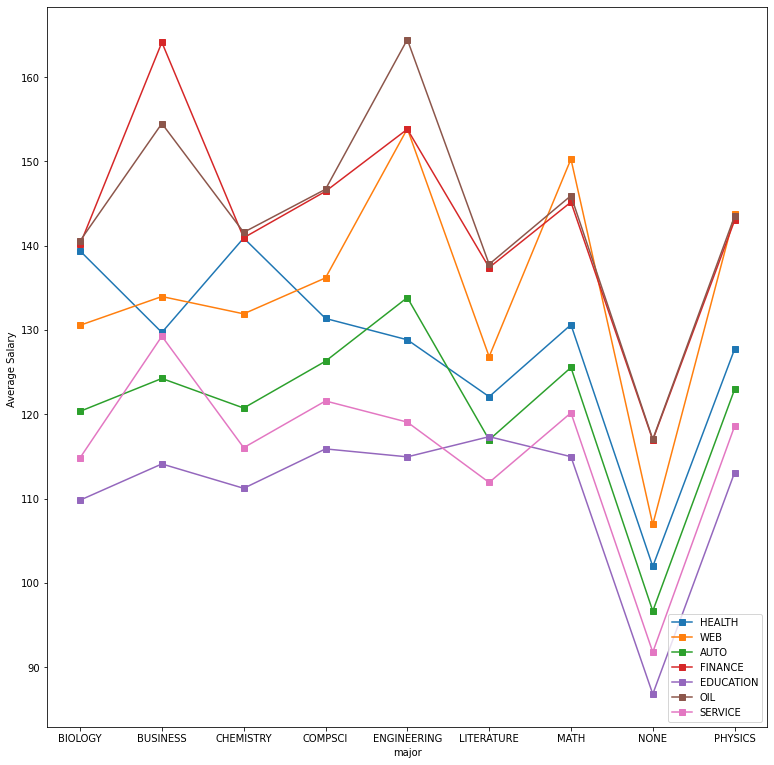

In [23]:
plot_feature_corr(train_data, 'industry', 'major', 'salary', order = 'n')

This plot seems quite interesting

Cleary, people without any major are paid least in each industry 

The graph suggests that the the major affects the pay in any particular industry

For example in the health industry, Chemistry major have the highest average salary and Biology major comes next.
Literature majors have  one of the lowest salary in all industries except in Education where Literature major has the 
highest average salary

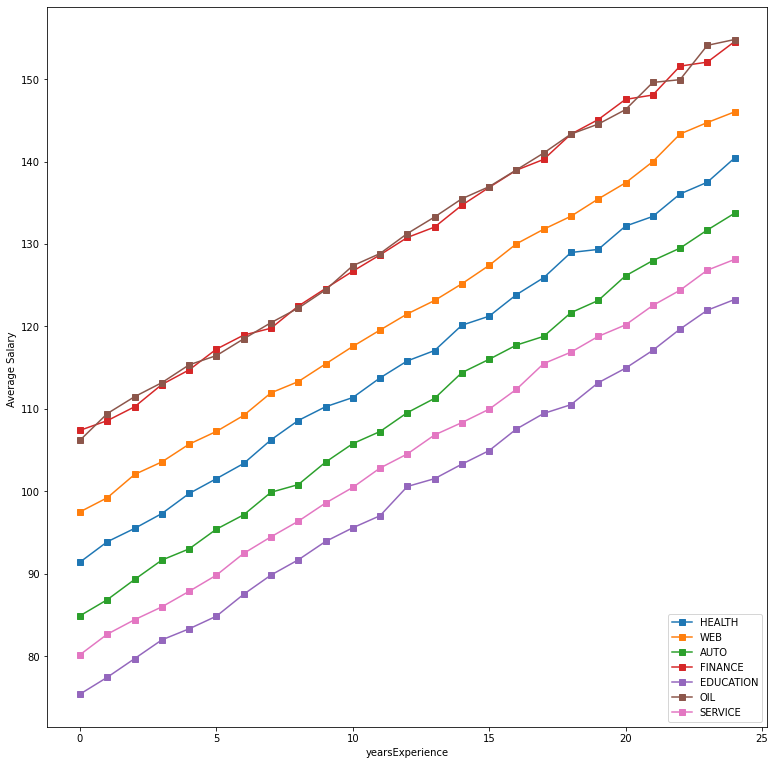

In [24]:
plot_feature_corr(train_data, 'industry', 'yearsExperience', 'salary', order = 'n')

Generally as the years of experience in the industry increased the average salary increased

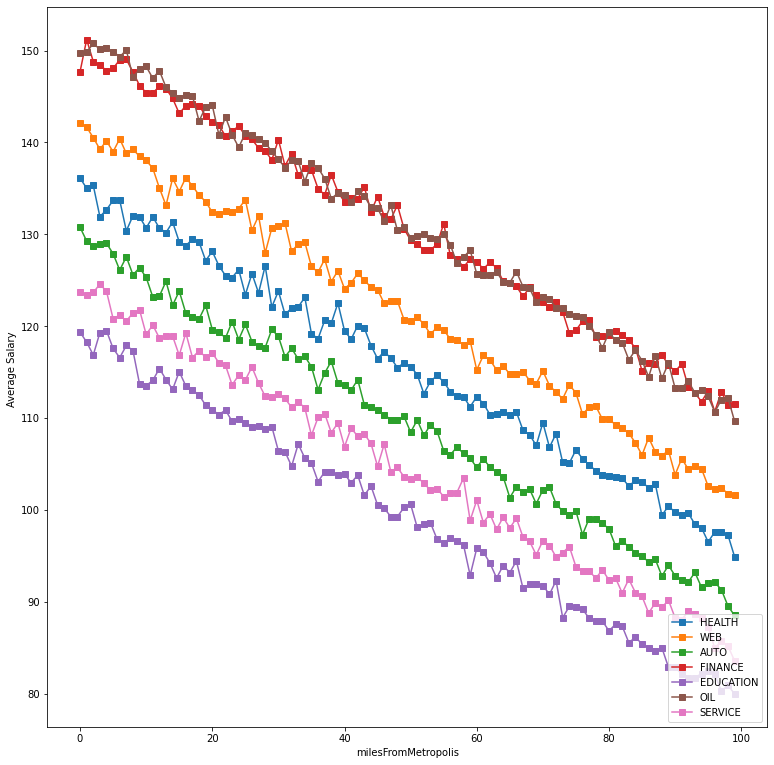

In [25]:
plot_feature_corr(train_data, 'industry',  'milesFromMetropolis', 'salary', order = 'n')

Generally as the miles from Metropolis in each industry increased the average salary decreased

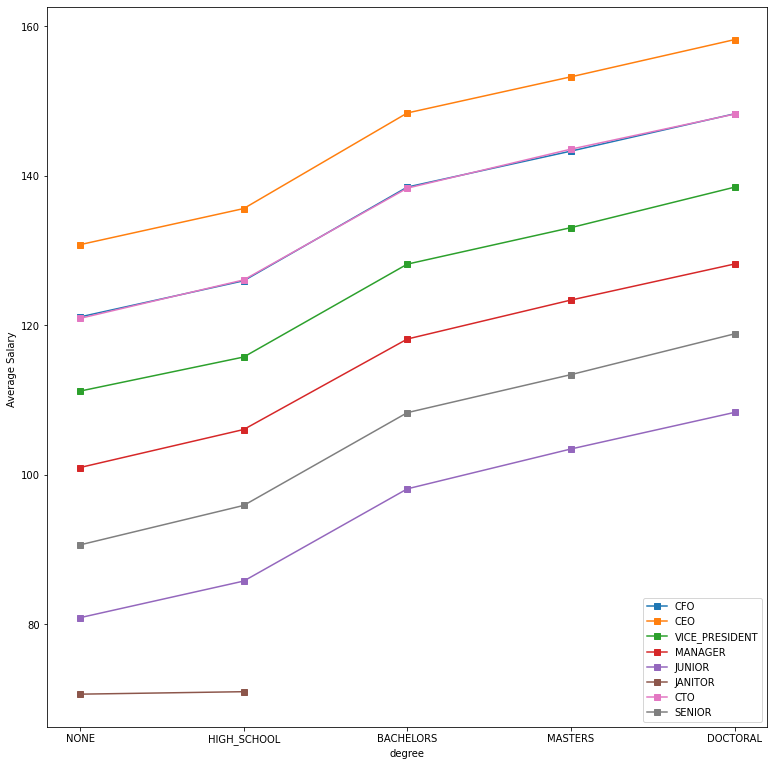

In [27]:
plot_feature_corr(train_data, 'jobType',  'degree', 'salary', order = 'y')

For any particular job type average salary increases as level of education increased.

Again CTO and CFOs have similar average salaries

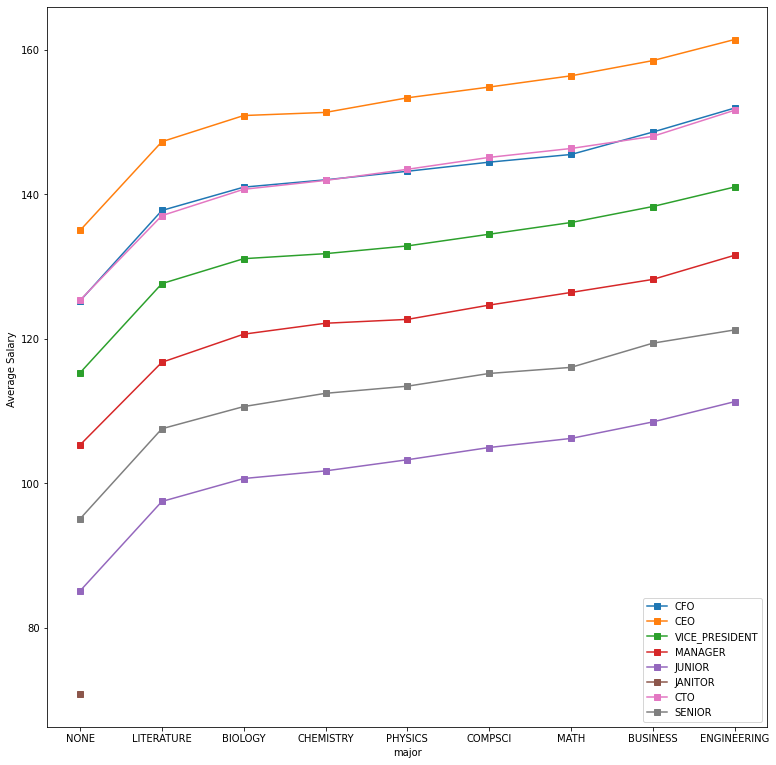

In [28]:
plot_feature_corr(train_data, 'jobType',  'major', 'salary', order = 'y')

For any particular job type the graph suggest that major has an impact on average salary, with engineering majors typically  earning the highest and with groups no majors having the lowest average salary

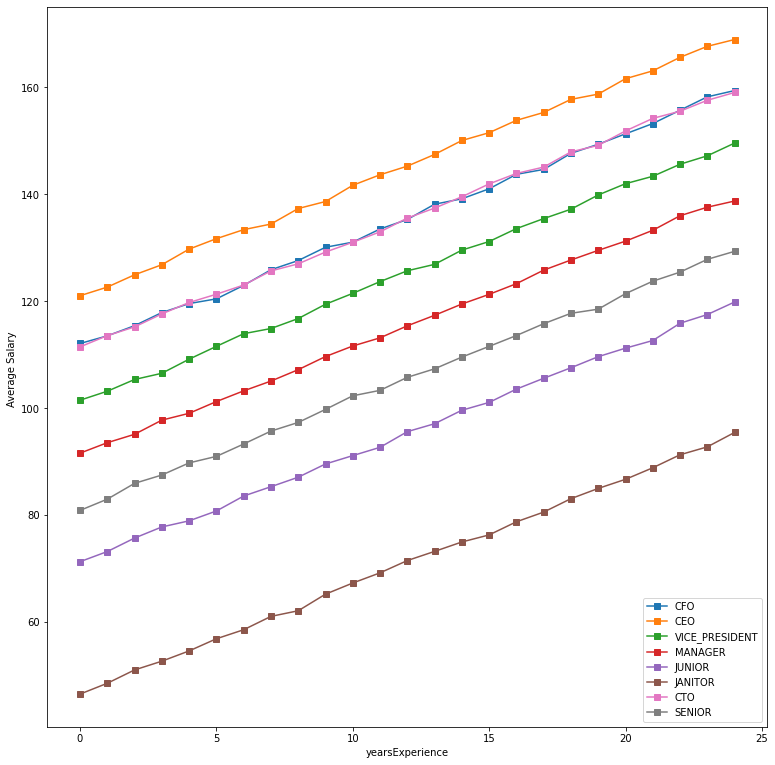

In [29]:
plot_feature_corr(train_data, 'jobType',  'yearsExperience', 'salary', order = 'y')

Generally as the years of experience  increased the average salary for each job type increased 

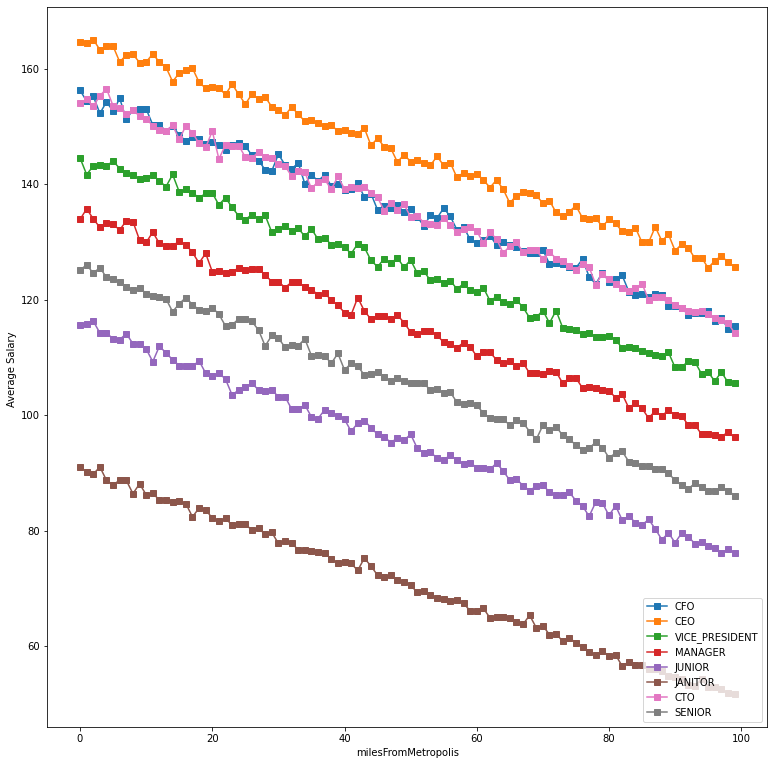

In [31]:
plot_feature_corr(train_data, 'jobType',  'milesFromMetropolis', 'salary', order = 'n')

Generally as the miles from Metropolis increased the average salary for each job type decreased

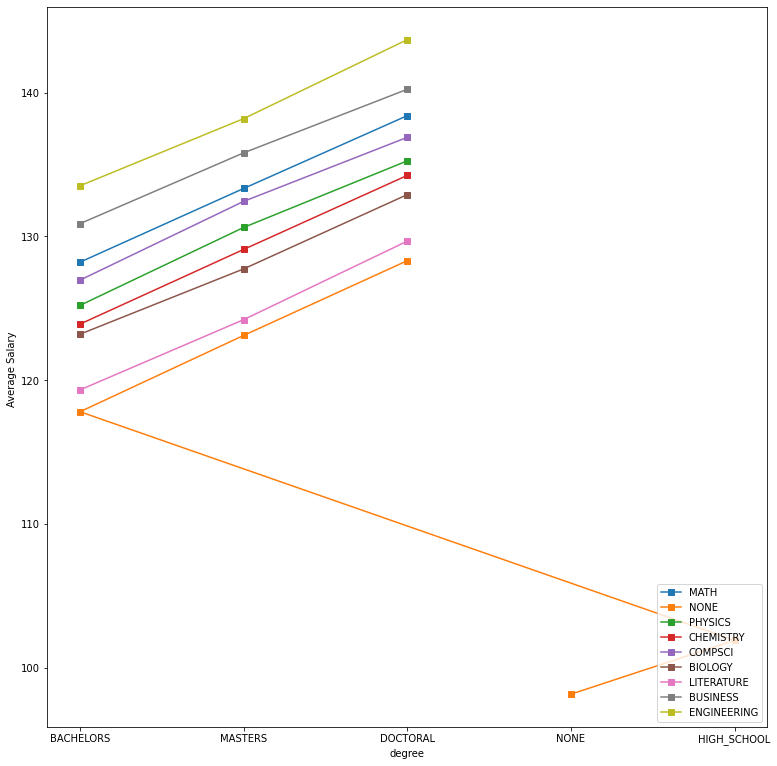

In [35]:
plot_feature_corr(train_data, 'major',  'degree', 'salary', order = 'y')

For any particular major, generally average salary increase with increase in level of education from NONE to DOCTORAL.

NONE and  HIGH SCHOOL Degrees ONE fall under None majors. A BACHELORS, MASTERS or DOCTORAL DEGREE has a specific major

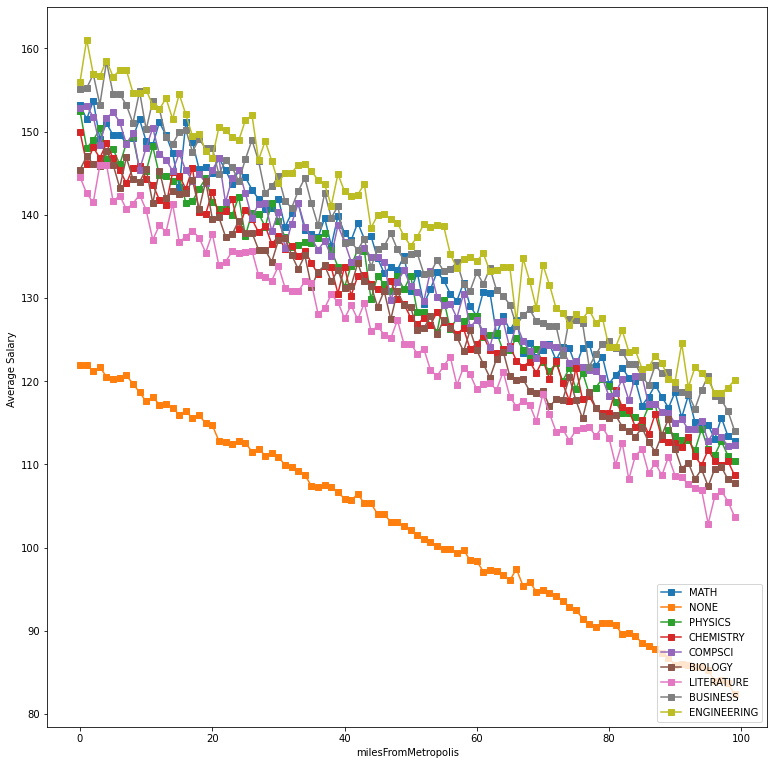

In [38]:
plot_feature_corr(train_data, 'major',  'milesFromMetropolis', 'salary', order = 'n')

Generally as the miles from Metropolis increased the average salary for each major decreased


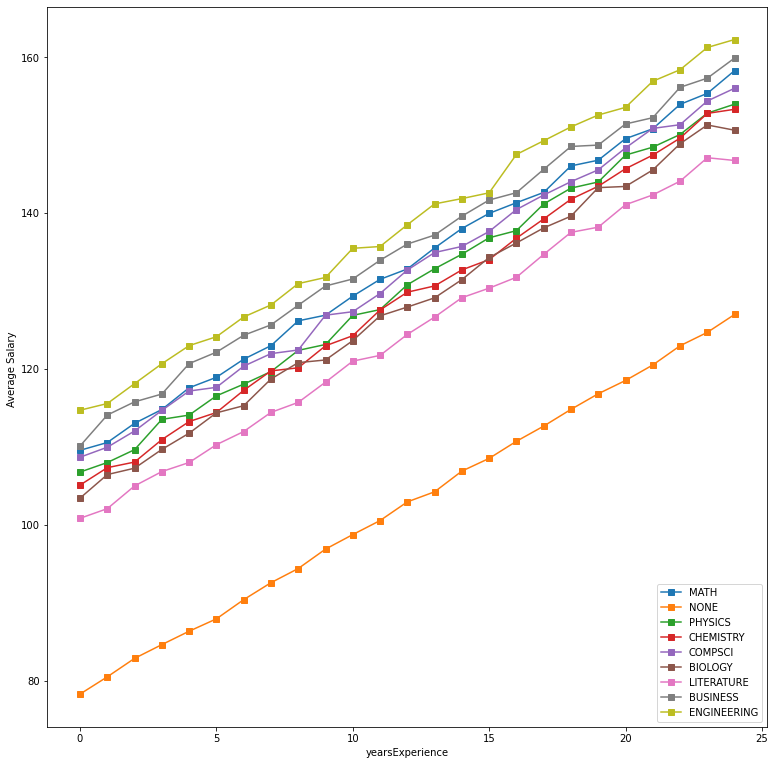

In [42]:
plot_feature_corr(train_data, 'major',  'yearsExperience', 'salary', order = 'n')

Generally as yearsExperience increase the average salary for each major increased


,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.374991
milesFromMetropolis,0.000673,1.000000,-0.297679
salary,0.374991,-0.297679,1.000000
